In [1]:
!pip install tensorflow

In [10]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
series = np.sin(0.1 * np.arange(200)) # + np.random.randn(200) * 0.1 

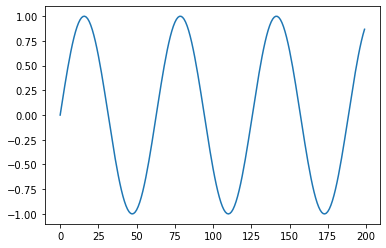

In [5]:
plt.plot(series)
# plt.show()

In [6]:
# noise 있는 데이터
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

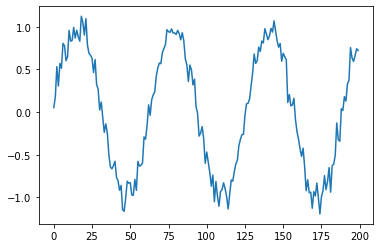

In [7]:
plt.plot(series)
plt.show()

In [8]:
# build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T] # 10개 데이터 중 9개
    X.append(x)
    y = series[t+T] # 10개 데이터 중 마지막 데이터
    Y.append(y)
    
np.array(X).shape # 2차원 배열
np.array(Y).shape # 1차원 배열

(190,)

In [9]:
# sequences data -> N x T x D -> 190 x 10 x 1(3차원 배열로 만들기)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(f'X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}')

X.shape:(190, 10, 1), Y.shape:(190,), N.length:190


In [11]:
# build a RNN model
# 1.Input
i = Input(shape = (T, 1)) # T x D

# 2.SimpleRNN(5, activation = 'tanh') : 5 - 노드개수
x = LSTM(5, activation = 'tanh')(i)

# 3.Output
x = Dense(1)(x) # scaler 값이어서 1임.
model = Model(i, x)
model.compile(loss = 'mse', optimizer = Adam(lr = 0.1))
# trainable params -> 41개. = hidden weights + current weights + bias
#                           = (features * unit) + (unit * unit) + (feature * unit)
#                           = (1 * 5) +(5 * 5) + (1 * 5) = 35
# 35 + output layer weight, bias = 35 + (unit * 1) + bias = 41

C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
model.summary() # 망각데이터 때문에 파라미터가 3배 증가함.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 80, 
              validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 1s 166ms/step - loss: 0.2678 - val_loss: 0.1284
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1084 - val_loss: 0.0803
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0723 - val_loss: 0.0491
Epoch 4/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0301 - val_loss: 0.0374
Epoch 5/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0381 - val_loss: 0.0304
Epoch 6/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0249 - val_loss: 0.0295
Epoch 7/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0266 - val_loss: 0.0286
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0214 - val_loss: 0.0231
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0227 - val_loss: 0.0263
Epoch 10/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0223 - val_loss: 0.0227
Epoch 11/80
3/3 [===========

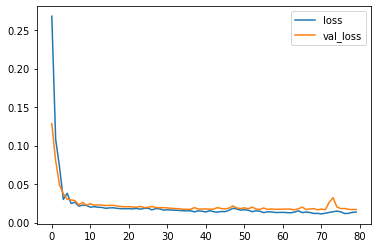

In [14]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [15]:
# Wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0]
    i += 1
    
    validation_predictions.append(p)

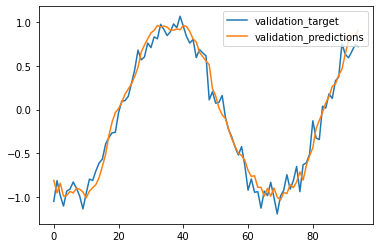

In [16]:
plt.plot(validation_target, label = 'validation_target')
plt.plot(validation_predictions, label = 'validation_predictions')
plt.legend()

In [17]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 마지막 데이터 - 이전 데이터 이용해서 예측.

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1) # 움직이는 듯한 느낌을 줌.
    #print(last_x)
    last_x[-1] = p

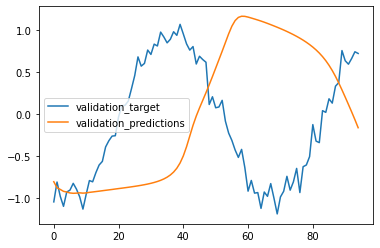

In [18]:
plt.plot(validation_target, label = 'validation_target')
plt.plot(validation_predictions, label = 'validation_predictions')
plt.legend()